In [2]:
#1 Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.(Show the shape and column names as well.)
import pandas as pd
df=pd.read_csv("BIKE DETAILS.csv")
df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [5]:
#2 Check for missing values in all columns and describe your approach for handling them.
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [15]:
df.dropna(inplace=True,axis=0)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [16]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


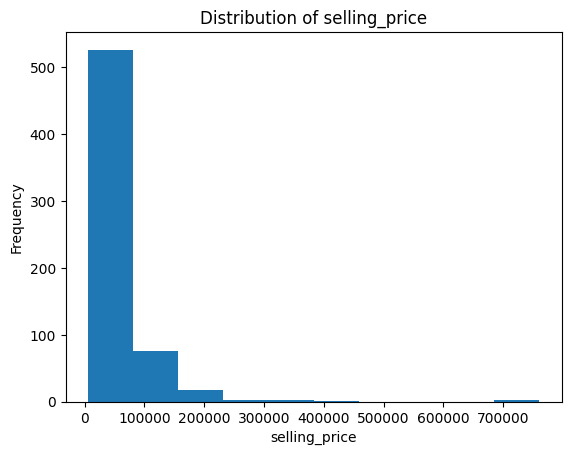

In [21]:
#3 Plot the distribution of selling prices using a histogram and describe the overall trend.
import matplotlib.pyplot as plt
plt.hist(df['selling_price'])
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.title('Distribution of selling_price')
plt.show()

In [ ]:
#insignts we got after analyzing the histogram we got to know that the frequency
#of the selling price between 0 to 100000 is more comparable to others.

In [9]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

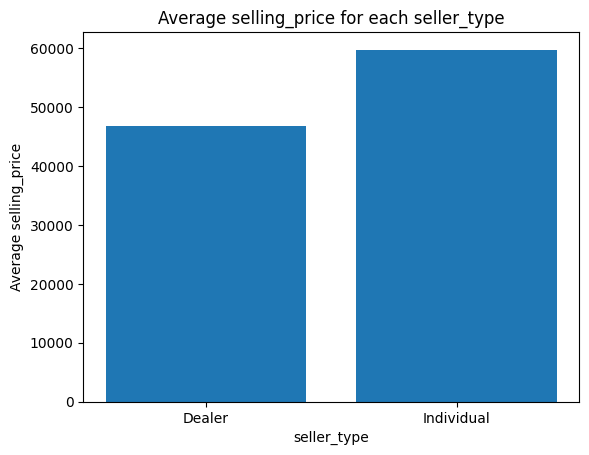

In [10]:
#4 Create a bar plot to visualize the average selling price for each seller_type and write one observation.
avg_selling_price =df.groupby('seller_type')['selling_price'].mean()
plt.bar(avg_selling_price.index, avg_selling_price.values)
plt.xlabel('seller_type')
plt.ylabel('Average selling_price')
plt.title('Average selling_price for each seller_type')
plt.show()


In [ ]:
# insights we got that the seller type "dealer" has more average sellig price.

In [11]:
#5 Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
df['owner'].unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

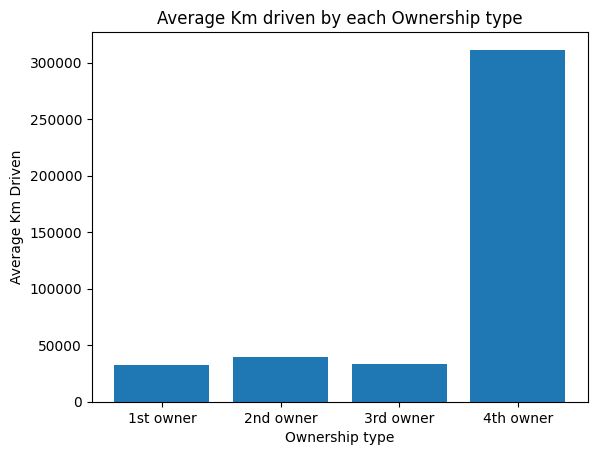

In [12]:
avg_km_driven =df.groupby('owner')['km_driven'].mean()
plt.bar(avg_km_driven.index, avg_km_driven.values)
plt.xlabel('Ownership type')
plt.ylabel('Average Km Driven')
plt.title('Average Km driven by each Ownership type')
plt.show()

In [13]:
#6 Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
import numpy as np
print("Summary Statistics Before Outlier Removal:")
print(df['km_driven'].describe())
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("\nSummary Statistics After Outlier Removal:")
print(df_cleaned['km_driven'].describe())

Summary Statistics Before Outlier Removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics After Outlier Removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


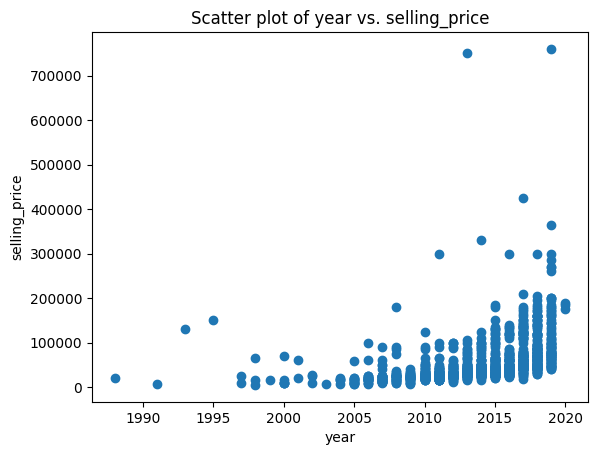

In [14]:
#7 Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('Scatter plot of year vs. selling_price')
plt.show()

In [20]:
 #8 Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
df1 = pd.DataFrame(df['seller_type'])
df_encoded = pd.get_dummies(df1, columns=['seller_type'], prefix='seller_type')
print(df_encoded.head())


   seller_type_Dealer  seller_type_Individual
0               False                    True
1               False                    True
2               False                    True
3               False                    True
4               False                    True


In [3]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [17]:
#9 Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
num_columns= df.select_dtypes(exclude=['object'])
num_columns

,selling_price,year,km_driven,ex_showroom_price
2,150000,2018,12000,148114.0
3,65000,2015,23000,89643.0
5,18000,2010,60000,53857.0
6,78500,2018,17000,87719.0
9,50000,2016,42000,60122.0
...,...,...,...,...
1056,17000,2010,500000,52000.0
1057,16000,2012,33000,51000.0
1058,15000,2013,35000,57000.0
1059,12000,2009,53000,58000.0


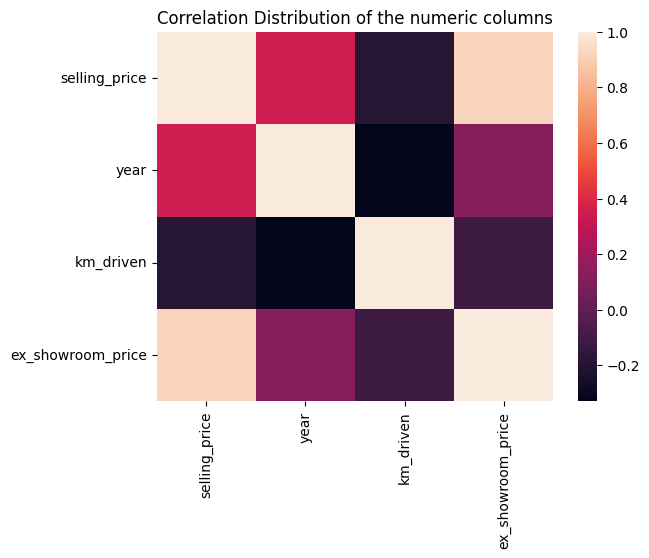

In [25]:
import seaborn as sns
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix)
plt.title('Correlation Distribution of the numeric columns')
plt.show()

In [28]:
#10 Summarize your findings in a brief report:

#What are the most important factors affecting a bike's selling price?
#Ans: The most inportant fetures are seller type, Km driven and the seller type as individual seller
      #will sell the bike in high price than
      #individual also if the bike had driven much it will be of low price along with the owner.


#Mention any data cleaning or feature engineering you performed.
#Ans: Data cleaning used is drop the  null values present in the ex showroom price column.
